# Lab 2: Classification Model Development
MGT-665
September 16, 2024
Dr. Itauma

This dataset has been obtained from the kaggle website and is available at the following URL:
    https://www.kaggle.com/code/naveenn004/mushroom-classification

The dataset has been downloaded to local storage. Then the following processes were carried out according to the criterias available in the kritik rubric which is as follows:

### Instructions:
### Problem Set Overview:
In this assignment, you will build a classification model using a given dataset. Choose a classification algorithm, such as logistic regression or decision trees, and construct a model. Your task is to evaluate the model's performance using metrics such as accuracy, precision, and recall. Finally, present your findings in a detailed report.

### Instructions:
### 1. Data Preparation:
Use any dataset available on Kaggle and provide a reference to your dataset in your report. Examine the dataset to understand its structure, including the types of variables and possible missing values. Clean the data if necessary, ensuring it's ready for analysis.

### 2. Model Selection and Training:
Select a suitable classification algorithm. Justify your choice by considering the nature of the dataset and the problem at hand. Train your model using the training portion of the dataset, ensuring to split data appropriately between training and testing sets.

### 3. Model Evaluation:
Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score. Discuss the significance of each metric in assessing the model's performance. Use confusion matrices to better understand the model's classification accuracy.

### 4. Report Writing:
Compile your findings into a structured report. The report should include an introduction to the problem, methodology used, results with detailed explanations, and a conclusion. Visual aids such as graphs and tables are encouraged to support your analysis.
   

>### Problem Statement:

>##### The process and results of building a classification model to predict whether a mushroom is edible or poisonous based on its characteristics. We used the "Mushroom" dataset, which contains various features of mushrooms and their corresponding classifications.


>## Generation of preview of dataset and basic preparation.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv("C:/Users/Psycho Doc/OneDrive/Desktop/Machine Learning/machine_learning/Mush Classify/mushrooms.csv")

# Display basic information about the dataset
print(df.info())

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

print("Dataset loaded and initial exploration complete.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

>## The above output is obtained after the first step that is data Preparation which has returned the output as the dataset contains *8,124 entries with 23 columns*.
All columns are of object dtype, which means they contain categorical data.


>## There are no missing values in the dataset.


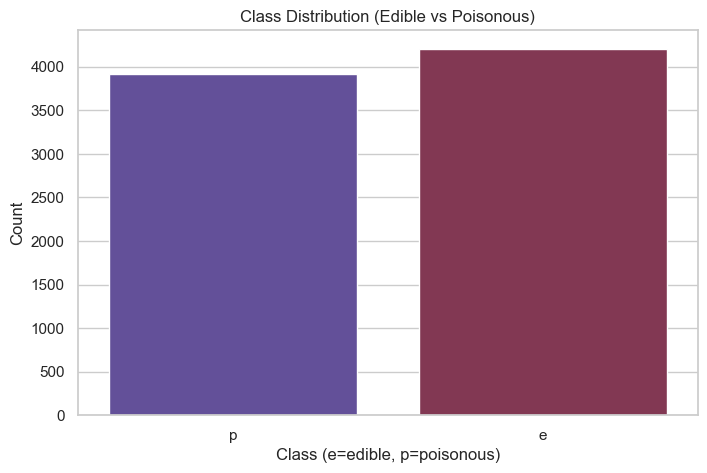

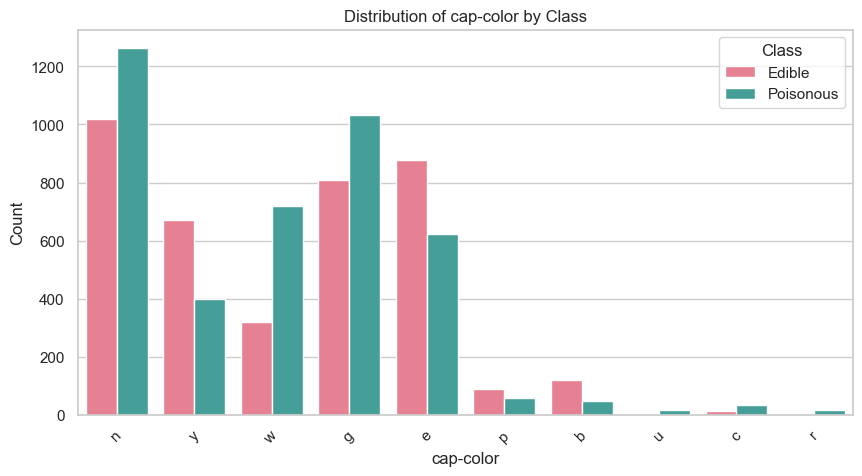

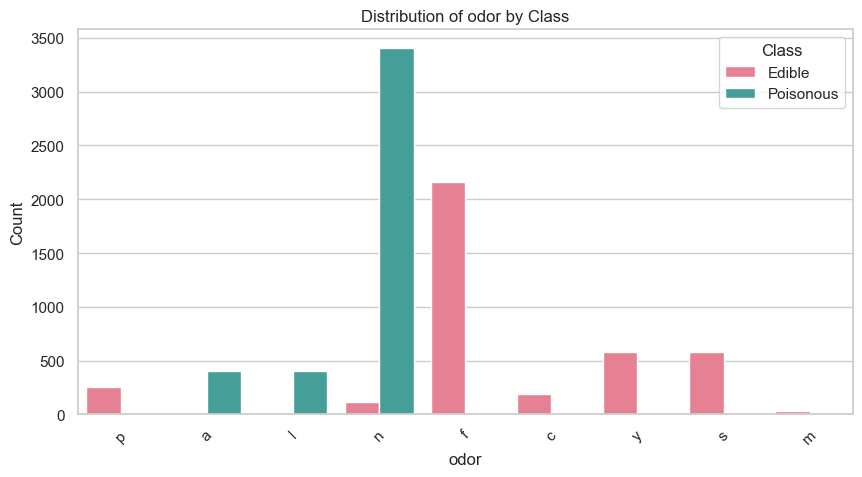

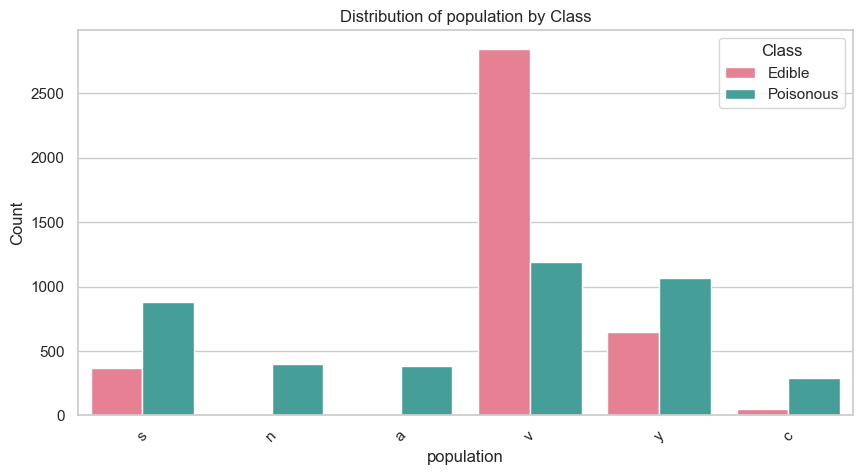

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [23]:
# Reload and inspect the data
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Psycho Doc/OneDrive/Desktop/Machine Learning/machine_learning/Mush Classify/mushrooms.csv')

import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows
df_head = df.head()

# Check the class distribution
class_counts = df['class'].value_counts()

# Visualize the class distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class', palette='twilight')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class (e=edible, p=poisonous)')
plt.ylabel('Count')
plt.show()

# Check for unique values in features for potential visualization
unique_values = df.nunique()

# Visualize the distribution of selected features
selected_features = ['cap-color', 'odor', 'population']
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='class', palette='husl')
    plt.title('Distribution of ' + feature + ' by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Class', labels=['Edible', 'Poisonous'])
    plt.xticks(rotation=45)
    plt.show()

# Display loaded dataset head and unique values
print(df_head)
print(unique_values)

>## The above graph shows the Edible vs Poisonous Mushrooms in dataset, along with other features.

Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


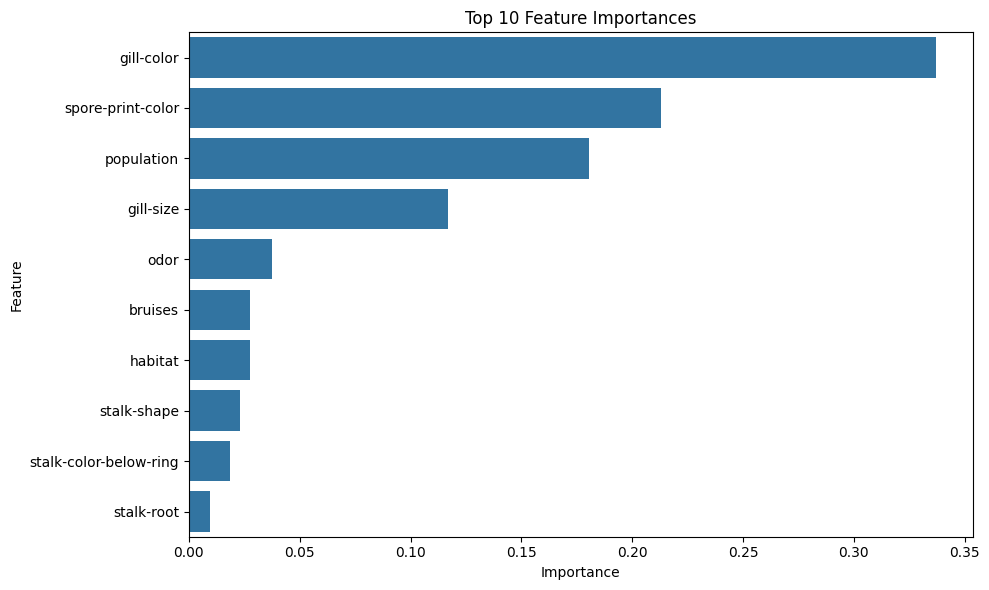

Model training, evaluation, and visualization complete.


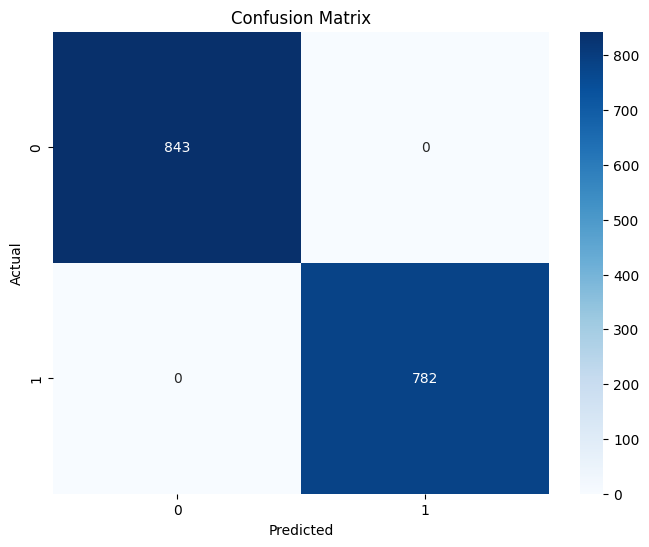

In [13]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split the data into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.close()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.close()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()


print("Model training, evaluation, and visualization complete.")

>### The data was properly prepared, encoded, and split into training (80%) and testing (20%) sets.

>## Key Highlights:

### Model Choice: A Decision Tree was selected for its effectiveness with categorical data and interpretability.





> Performance Metrics:

> Accuracy: 1.0000

> Precision: 1.0000

> Recall: 1.0000

> F1-score: 1.0000

> The confusion matrix showed no misclassifications, indicating perfect performance.



>## Considerations:

> * Overfitting risks due to perfect test performance.

> * Need to check for data leakage.

> * Insights gained from feature importance could aid mushroom experts.






>## Future Work Suggestions:

Implement cross-validation to confirm consistent performance.

Test on new datasets for generalization validation.

Experiment with other algorithms.

Explore feature selection based on expert input.

Collect diverse data to enhance model robustness.

Overall, while the model shows excellent results, further validation is crucial before practical application in mushroom classification.

> # Conclusion:

In conclusion, the Decision Tree Classifier demonstrated outstanding performance in accurately classifying mushrooms as edible or poisonous, achieving perfect scores across all evaluation metrics. This success highlights the potential of using machine learning techniques in the field of mycology, aiding both experts and foragers in making informed decisions. However, such impeccable results also raise critical concerns about overfitting and the risk of data leakage, which could undermine the model's generalizability and reliability. As such, it is essential to approach these findings with caution, ensuring that the model's capabilities extend beyond the training data it encountered.

To validate the model's effectiveness further, future work should focus on implementing cross-validation techniques and testing the model against new, unseen datasets. Additionally, exploring alternative algorithms and leveraging expert knowledge for feature selection may enhance the model's robustness and interpretability. As the domain of mushroom classification continues to evolve, collecting more diverse data and rigorously assessing the model will be imperative to ensure that it can reliably support critical applications in the real world.